# Workshop: Synthesis

In this workshop we will get to know the classiq platform and the advantages in designing algorithms in a functional way. Along the notebook there are code examples. Try to play with the different parameters and see the difference in the resulting circuits. The [User Guide](https://docs.classiq.io/latest/user-guide/) will be helpful. Enjoy.

# Load helper functions

In [8]:
import matplotlib.pyplot as plt


def print_results(result):
    result_items = result.items()
    x = [int(single_res[0], 2) for single_res in result_items]
    y = [single_res[1] for single_res in result_items]
    x_tics = [single_res[0] for single_res in result_items]
    plt.xticks(x, labels=x_tics, rotation=60)
    # plt.xticks(x,labels=x)
    plt.bar(x, y, width=15)


def str2num(str):
    return int(str[::-1], 2)


def parse_arithmetic_results(result, arithmetic_fun: str):
    # using int(bits, 2) to convert the results into a decimal number.
    # before that we convert the order of the bits.
    if arithmetic_fun == "Adder":
        for tupple in result.keys():
            print(str2num(tupple[0]), "+", str2num(tupple[1]), "=", str2num(tupple[2]))
    elif arithmetic_fun == "Multiplier":
        for tupple in result.keys():
            print(str2num(tupple[0]), "*", str2num(tupple[1]), "=", str2num(tupple[2]))
    else:
        raise TypeError("arithmetic_fun can be only Multiplier or Adder")

## Load the libraries

In [2]:
pip install classiq


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.6/363.6 kB 5.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 12.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 14.1 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 12.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.9 

In [9]:
import classiq
from classiq import Model, RegisterUserInput, execute, show, synthesize, GeneratedCircuit, OptimizationParameter, Constraints
from classiq.builtin_functions import Adder, StatePreparation
from classiq.builtin_functions.state_preparation import PMF
from classiq.execution import ExecutionDetails, ExecutionPreferences

In [10]:
classiq.authenticate()

# Basic models

## State preparation

First we will prepare a register of 2 qubits in a desired state

In [11]:
model = Model()

probs = [0.4, 0.05, 0.2, 0.05, 0.3, 0.0, 0.0, 0.0]
sp_params = StatePreparation(
    probabilities=probs, error_metric={"L2": {"upper_bound": 0.01}}
)

sp1_out = model.StatePreparation(params=sp_params)

qprog = synthesize(model.get_model())
show(qprog)

Opening: https://platform.classiq.io/circuit/6024b27b-b164-4ebf-91f6-2e77d8af04b0?version=0.29.2


/usr/bin/xdg-open: 882: x-www-browser: not found
/usr/bin/xdg-open: 882: firefox: not found
/usr/bin/xdg-open: 882: iceweasel: not found
/usr/bin/xdg-open: 882: seamonkey: not found
/usr/bin/xdg-open: 882: mozilla: not found
/usr/bin/xdg-open: 882: epiphany: not found
/usr/bin/xdg-open: 882: konqueror: not found
/usr/bin/xdg-open: 882: chromium: not found
/usr/bin/xdg-open: 882: chromium-browser: not found
/usr/bin/xdg-open: 882: google-chrome: not found
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'https://platform.classiq.io/circuit/6024b27b-b164-4ebf-91f6-2e77d8af04b0?version=0.29.2'


## Do it yourself

Create a circuit which has the following properties:

- These amplitudes: [-0.540061731, -0.38575837, -0.23145502, -0.07715167,  0.07715167,
    0.23145502,  0.385758371,  0.540061731]
- Error Metic L2 of 0.1
- Documentation: [Docs](https://docs.classiq.io/latest/user-guide/function-library/builtin-functions/state-preparation/state-preparation/#example-3-amplitudes-preparation)
- See the generated circuit

<details>
<summary> answer</summary>
<code>
    amp = [-0.540061731, -0.38575837, -0.23145502, -0.07715167,  0.07715167,
        0.23145502,  0.385758371,  0.540061731]
    params = StatePreparation(
            amplitudes=amp,
            error_metric={"L2": {"upper_bound": 0.1}},
        )

    model = Model()
    model.StatePreparation(params)
    qprog = synthesize(model.get_model())
    show(qprog)
</code>

</details>

In [15]:
# Your code here
model2 = Model()
probs2= [-0.540061731, -0.38575837, -0.23145502, -0.07715167, 0.07715167, 0.23145502, 0.385758371, 0.540061731]
sp_params = StatePreparation(
    amplitudes=probs2, error_metric={"L2": {"upper_bound": 0.1}}
)

sp1_out = model2.StatePreparation(params=sp_params)

qprog = synthesize(model2.get_model())
show(qprog)

Opening: https://platform.classiq.io/circuit/03948778-699a-428b-97eb-56860982e5d7?version=0.29.2


/usr/bin/xdg-open: 882: x-www-browser: not found
/usr/bin/xdg-open: 882: firefox: not found
/usr/bin/xdg-open: 882: iceweasel: not found
/usr/bin/xdg-open: 882: seamonkey: not found
/usr/bin/xdg-open: 882: mozilla: not found
/usr/bin/xdg-open: 882: epiphany: not found
/usr/bin/xdg-open: 882: konqueror: not found
/usr/bin/xdg-open: 882: chromium: not found
/usr/bin/xdg-open: 882: chromium-browser: not found
/usr/bin/xdg-open: 882: google-chrome: not found
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'https://platform.classiq.io/circuit/03948778-699a-428b-97eb-56860982e5d7?version=0.29.2'


## Arithmetic Functions

Arithmetic functions are the basic building block of any computations. In quantum computing, they are essential for building oracles which are contained in many quantum algorithms, such as the Grover search algorithm.

However, it is not straightforward how to implement arithmetic functions on qubits. In Classiq's platform, it is possible only to declare the arithmetic function you want to use and construct your computation without going into the gate level.

In this tutorial, we will first generate two bell states:

$$\ket{\psi^{(00)}} = \frac{1}{\sqrt{2}}(\ket{0} + \ket{3})$$
$$\ket{\psi^{(01)}} = \frac{1}{\sqrt{2}}(\ket{1} + \ket{2})$$

First, let's create the two bell states using the StatePreparation function to declare the probabilities.

In [16]:
probs1 = [0.5, 0, 0, 0.5]
sp1_params = StatePreparation(
    probabilities=probs1, error_metric={"L2": {"upper_bound": 0.01}}
)

probs2 = [0, 0.5, 0.5, 0]
sp2_params = StatePreparation(
    probabilities=probs2, error_metric={"L2": {"upper_bound": 0.01}}
)

The implementation of the quantum computation is in the `ModelDesigner` object, and then we first put into it the state preparation.


In [17]:
model = Model()

sp1_out = model.StatePreparation(params=sp1_params)
sp2_out = model.StatePreparation(params=sp2_params)

The Adder parameters can define the registers. For example, which qubits create the state preparations and which qubits contain the output results. It is possible to use the same qubits for both the state preparation and the output qubits, thus reducing the number of qubits, but it is not shown here for simplicity.

In [18]:
adder_params = Adder(
    left_arg=RegisterUserInput(size=2),
    right_arg=RegisterUserInput(size=2),
    output_size=3,
)

adder_out = model.Adder(
    adder_params, in_wires={"left_arg": sp1_out["OUT"], "right_arg": sp2_out["OUT"]}
)

We also add a sampling operation to the model and output registers:

In [19]:
model.sample()
model.set_outputs(
    {"a": adder_out["left_arg"], "b": adder_out["right_arg"], "sum": adder_out["sum"]}
)

After we added the `StatePreparation`s and the `Adder` objects to the `ModelDesigner` object, we can synthesize the circuit and see the gate implementation.

In [20]:
qprog = synthesize(model.get_model())
show(qprog)

Opening: https://platform.classiq.io/circuit/7dd2b1d9-766b-4e95-8c56-5aefce435ab4?version=0.29.2


/usr/bin/xdg-open: 882: x-www-browser: not found
/usr/bin/xdg-open: 882: firefox: not found
/usr/bin/xdg-open: 882: iceweasel: not found
/usr/bin/xdg-open: 882: seamonkey: not found
/usr/bin/xdg-open: 882: mozilla: not found
/usr/bin/xdg-open: 882: epiphany: not found
/usr/bin/xdg-open: 882: konqueror: not found
/usr/bin/xdg-open: 882: chromium: not found
/usr/bin/xdg-open: 882: chromium-browser: not found
/usr/bin/xdg-open: 882: google-chrome: not found
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'https://platform.classiq.io/circuit/7dd2b1d9-766b-4e95-8c56-5aefce435ab4?version=0.29.2'


Let's run the quantum circuit localy see the results.

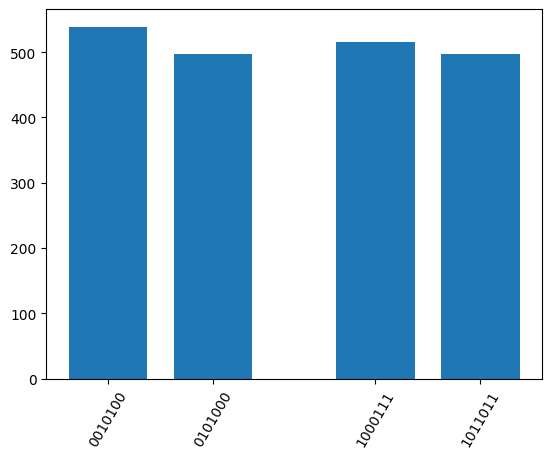

In [21]:
res = execute(qprog).result()
res = res[0].value

print_results(res.counts)

Here we want to saperate the information into the different registers, the two prepared states in superposition and the output in the left most register.

In [22]:
results = ExecutionDetails.parse_obj(res)

output_results = results.counts_of_multiple_outputs(["a", "b", "sum"])

parse_arithmetic_results(output_results, "Adder")

3 + 2 = 5
0 + 2 = 2
3 + 1 = 4
0 + 1 = 1


### Execute on cuQuantum

We will leverage the cuQuantum framework to execute larger scale quantum programs

In [23]:
# Grab the generated circuit
generated_circuit = GeneratedCircuit.parse_raw(qprog)

#store the reseult in a local file
generated_circuit.save_results(filename="adder.json")

In [24]:
# Execute the circuit on the cluster
./JHS_notebooks/run_circuit_on_cuquantum adder.json

SyntaxError: invalid syntax (1117978396.py, line 2)

## Do it your self

We have just added multiple number together, using the same method let's now also multiply things together.
Please calculate at least 2 * 1.

Steps:
1. Prepare two superposition which encodes the input numbers
2. Use the `Multiplier` function to multiply the two numbers together
3. Synthesize the circuite
4. Execute the circuit with cuQuantum

Docs to `Multiplier` can be found [here](https://docs.classiq.io/latest/user-guide/function-library/builtin-functions/arithmetic/multiplication/)

<details>
<summary> answer </summary>
<code>

    probs1 = [0.5, 0, 0.5, 0]
    sp1_params = StatePreparation(
        probabilities=probs1, error_metric={"L2": {"upper_bound": 0.01}}
    )

    probs2 = [0, 0.5, 0.5, 0]
    sp2_params = StatePreparation(
        probabilities=probs2, error_metric={"L2": {"upper_bound": 0.01}}
    )

    model = Model()

    sp1_out = model.StatePreparation(params=sp1_params)
    sp2_out = model.StatePreparation(params=sp2_params)

    multiplier_params = Multiplier(
        left_arg=RegisterUserInput(size=2),
        right_arg=RegisterUserInput(size=2),
        output_size=4,
    )

    multiplier_out = model.Multiplier(
        multiplier_params,
        in_wires={"left_arg": sp1_out["OUT"], "right_arg": sp2_out["OUT"]},
    )

    model.sample()
    model.set_outputs(
        {"a": multiplier_out["left_arg"], "b": multiplier_out["right_arg"], "product": multiplier_out["product"]}
    )

    qprog = synthesize(model.get_model())

    res = execute(qprog).result()

    results = ExecutionDetails.parse_obj(res[0].value)

    output_results_multiplier = results.counts_of_multiple_outputs(["a", "b", "product"])

    parse_arithmetic_results(output_results_multiplier, "Multiplier")
</code>

</detials>


Opening: https://platform.classiq.io/circuit/0952ce7c-aef0-4363-b054-720d2de93ffa?version=0.29.2


/usr/bin/xdg-open: 882: x-www-browser: not found
/usr/bin/xdg-open: 882: firefox: not found
/usr/bin/xdg-open: 882: iceweasel: not found
/usr/bin/xdg-open: 882: seamonkey: not found
/usr/bin/xdg-open: 882: mozilla: not found
/usr/bin/xdg-open: 882: epiphany: not found
/usr/bin/xdg-open: 882: konqueror: not found
/usr/bin/xdg-open: 882: chromium: not found
/usr/bin/xdg-open: 882: chromium-browser: not found
/usr/bin/xdg-open: 882: google-chrome: not found
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'https://platform.classiq.io/circuit/0952ce7c-aef0-4363-b054-720d2de93ffa?version=0.29.2'


0 * 3 = 0
1 * 2 = 2
3 * 2 = 6
1 * 3 = 3
3 * 3 = 1
2 * 2 = 4
2 * 0 = 0
0 * 1 = 0
3 * 0 = 0
3 * 1 = 3
0 * 2 = 0
2 * 3 = 6
1 * 1 = 1
1 * 0 = 0
0 * 0 = 0
2 * 1 = 2


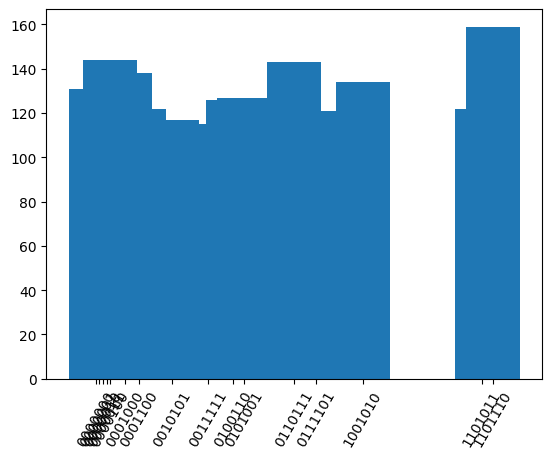

In [39]:
from classiq import Preferences
from classiq.builtin_functions import Multiplier

# Your code here

probs1 = [0.25, 0.25, 0.25, 0.25]
sp1_params = StatePreparation(
    probabilities=probs1, error_metric={"L2": {"upper_bound": 0.01}}
)

probs2 = [0.25, 0.25, 0.25, 0.25]
sp2_params = StatePreparation(
    probabilities=probs2, error_metric={"L2": {"upper_bound": 0.01}}
)


model = Model()

sp1_out = model.StatePreparation(params=sp1_params)
sp2_out = model.StatePreparation(params=sp2_params)


mult_params = Multiplier(
    left_arg=RegisterUserInput(size=2),
    right_arg=RegisterUserInput(size=2),
    output_size=3,
)

multiplier_out = model.Multiplier(
    mult_params, in_wires={"left_arg": sp1_out["OUT"], "right_arg": sp2_out["OUT"]}
)


model.sample()
model.set_outputs(
    {"a": multiplier_out["left_arg"], "b": multiplier_out["right_arg"], "multiplication": multiplier_out["product"]}
)


qprog = synthesize(model.get_model())
show(qprog)


res = execute(qprog).result()
res = res[0].value

print_results(res.counts)


results = ExecutionDetails.parse_obj(res)

output_results = results.counts_of_multiple_outputs(["a", "b", "multiplication"])

parse_arithmetic_results(output_results, "Multiplier")

## Arithmetic Expressions: complex search space
The arithmetic expression are decomposed of smaller functional blocks, and their search space is huge. See all [arithmetic expressions](https://docs.classiq.io/latest/user-guide/function-library/builtin-functions/arithmetic/arithmetic-expression/).

In [35]:
from classiq import (
    Model,
    RegisterUserInput,
    construct_grover_model,
    execute,
    set_constraints,
    show,
    synthesize,
)
from classiq.builtin_functions import ArithmeticOracle, GroverOperator, StatePreparation
from classiq.execution import ExecutionDetails


def uniform_sp_params(num_qubits: int):
    single_prob = 1.0 / (2**num_qubits)
    probs_lst = [single_prob] * (2**num_qubits)
    sp_params = StatePreparation(
        probabilities=probs_lst, error_metric={"L2": {"upper_bound": 0.01}}
    )
    return sp_params

In [ ]:
# create the oracle
oracle_params = ArithmeticOracle(
    expression="a + b == 7 and a & b == 0",
    definitions=dict(
        a=RegisterUserInput(size=4), b=RegisterUserInput(size=4, is_signed=True)
    ),
    uncomputation_method="naive",
    qubit_count=18,
)
# wrap it into grover, including diffuser
grover_params = GroverOperator(oracle_params=oracle_params)

model = Model()
model.sample()
# initialize with uniform superposition
sp1_out1 = model.StatePreparation(
    params=uniform_sp_params(oracle_params.definitions["a"].size)
)
sp1_out2 = model.StatePreparation(
    params=uniform_sp_params(oracle_params.definitions["b"].size)
)
# wiring the StatePreparation into "a" and "b" registers
out_wires = model.GroverOperator(
    params=grover_params, in_wires={"a": sp1_out1["OUT"], "b": sp1_out2["OUT"]}
)
# measuring only regiters "a" and "b"
model.set_outputs(out_wires)

constraints = Constraints(max_width=22)
serialized_model = set_constraints(model.get_model(), constraints)
qprog = synthesize(serialized_model)

show(qprog)

#### making an optimizing circuit by requiring less qubits
##### See: uncomputation_method="optimized"
You can see the difference in different optimization strategies of the entire circuit.

In [42]:
# create the oracle
oracle_params = ArithmeticOracle(
    expression="a + b == 7 and a & b == 0",
    definitions=dict(
        a=RegisterUserInput(size=4), b=RegisterUserInput(size=4, is_signed=True)
    ),
    uncomputation_method="optimized",
    qubit_count=18,
)
# wrap it into grover, including diffuser
grover_params = GroverOperator(oracle_params=oracle_params)

model = Model()
model.sample()
# initialize with uniform superposition
sp1_out1 = model.StatePreparation(
    params=uniform_sp_params(oracle_params.definitions["a"].size)
)
sp1_out2 = model.StatePreparation(
    params=uniform_sp_params(oracle_params.definitions["b"].size)
)
# wiring the StatePreparation into "a" and "b" registers
out_wires = model.GroverOperator(
    params=grover_params, in_wires={"a": sp1_out1["OUT"], "b": sp1_out2["OUT"]}
)

model.set_outputs(out_wires)

constraints = Constraints(max_width=18)
serialized_model = set_constraints(model.get_model(), constraints)
qprog = synthesize(serialized_model)

show(qprog)

Opening: https://platform.classiq.io/circuit/31952771-669d-4d53-8ce7-1297f376fe7a?version=0.29.2


In [43]:
# executing and taking out 'a' and 'b' register results
results = execute(qprog).result()
sample_results = results[0].value
register_res = sample_results.counts_of_multiple_outputs(("a", "b"))

/usr/bin/xdg-open: 882: x-www-browser: not found
/usr/bin/xdg-open: 882: firefox: not found
/usr/bin/xdg-open: 882: iceweasel: not found
/usr/bin/xdg-open: 882: seamonkey: not found
/usr/bin/xdg-open: 882: mozilla: not found
/usr/bin/xdg-open: 882: epiphany: not found
/usr/bin/xdg-open: 882: konqueror: not found
/usr/bin/xdg-open: 882: chromium: not found
/usr/bin/xdg-open: 882: chromium-browser: not found
/usr/bin/xdg-open: 882: google-chrome: not found
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'https://platform.classiq.io/circuit/31952771-669d-4d53-8ce7-1297f376fe7a?version=0.29.2'


In [44]:
sorted_res = sorted(register_res.items(), key=lambda item: item[1], reverse=True)

sorted_res[0][0]

('1000', '0110')

In [45]:
def det_sign(binary_string: str) -> int:
    if binary_string[0] == "1":
        return -1
    else:
        return 1


def res_interpret(reg1, reg2, is_signed1=False, is_signed2=False) -> tuple:
    fliped1, fliped2 = reg1[::-1], reg2[::-1]
    reg1_to_int = det_sign(fliped1) * int(fliped1, 2) if is_signed1 else int(fliped1, 2)
    reg2_to_int = det_sign(fliped1) * int(fliped2, 2) if is_signed1 else int(fliped2, 2)

    return reg1_to_int, reg2_to_int

In [46]:
ref_results = res_interpret(sorted_res[0][0][0], sorted_res[0][0][1], is_signed2=True)
dict(zip(("a", "b"), ref_results))

{'a': 1, 'b': 6}

In [47]:
# Execute on cuQuantum

# Grab the generated circuit
generated_circuit = GeneratedCircuit.parse_raw(qprog)

#store the reseult in a local file
generated_circuit.save_results(filename="grover.json")

In [48]:
# Execute the circuit on the cluster
./JHS_notebooks/run_circuit_on_cuquantum grover.json

SyntaxError: invalid syntax (3416773747.py, line 2)

Now using a simpler option 

In [37]:
uncomputation_method = "optimized"

model = construct_grover_model(
    definitions=[
        ("a", RegisterUserInput(size=4)),
        ("b", RegisterUserInput(size=4, is_signed=True)),
    ],
    expression="a + b == 7 and a & b == 0",
    num_reps=3,
    uncomputation_method=uncomputation_method,
)
# constraints = Constraints(
#     max_width=22,
#     optimization_parameter=OptimizationParameter.DEPTH
# )
# serialized_model = set_constraints(model, constraints)
qprog = synthesize(model)

show(qprog)

Opening: https://platform.classiq.io/circuit/f49397b9-d21f-43d3-bfba-2846f97f666b?version=0.29.2


/usr/bin/xdg-open: 882: x-www-browser: not found
/usr/bin/xdg-open: 882: firefox: not found
/usr/bin/xdg-open: 882: iceweasel: not found
/usr/bin/xdg-open: 882: seamonkey: not found
/usr/bin/xdg-open: 882: mozilla: not found
/usr/bin/xdg-open: 882: epiphany: not found
/usr/bin/xdg-open: 882: konqueror: not found
/usr/bin/xdg-open: 882: chromium: not found
/usr/bin/xdg-open: 882: chromium-browser: not found
/usr/bin/xdg-open: 882: google-chrome: not found
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'https://platform.classiq.io/circuit/f49397b9-d21f-43d3-bfba-2846f97f666b?version=0.29.2'


In [ ]:
results = execute(qprog).result()
sample_results = results[0].value
register_res = sample_results.counts_of_multiple_outputs(("a", "b"))
sorted_res = sorted(register_res.items(), key=lambda item: item[1], reverse=True)
ref_results = res_interpret(sorted_res[0][0][0], sorted_res[0][0][1], is_signed2=True)
dict(zip(("a", "b"), ref_results))

## Do it yourself

We want to find possible dimentions of a 3d trapezoid with a total volume of 20. This is the formula to get the volume of a trapezoid:

$$volume = \frac{b+B}{2} * height * length$$
<img src="https://uploads-cdn.omnicalculator.com/images/trapezoidal%20prism%20volume/trapezoidal%20prism%20volume_01a.png" alt="Drawing" style="max-height: 350px;"/>

In [41]:
#Your code here
uncomputation_method = "optimized"

model = construct_grover_model(
    definitions=[
        ("b", RegisterUserInput(size=4)),
        ("B", RegisterUserInput(size=4)),
        ("h", RegisterUserInput(size=4)),
        ("l", RegisterUserInput(size=4)),
    ],
    expression="(B + b)*h*l == 30",
    num_reps=1,
    uncomputation_method=uncomputation_method,
)
# constraints = Constraints(
#     max_width=22,
#     optimization_parameter=OptimizationParameter.DEPTH
# )
# serialized_model = set_constraints(model, constraints)
qprog = synthesize(model)

show(qprog)

Opening: https://platform.classiq.io/circuit/e85cf4fb-1990-4d94-a209-895306410f68?version=0.29.2


/usr/bin/xdg-open: 882: x-www-browser: not found
/usr/bin/xdg-open: 882: firefox: not found
/usr/bin/xdg-open: 882: iceweasel: not found
/usr/bin/xdg-open: 882: seamonkey: not found
/usr/bin/xdg-open: 882: mozilla: not found
/usr/bin/xdg-open: 882: epiphany: not found
/usr/bin/xdg-open: 882: konqueror: not found
/usr/bin/xdg-open: 882: chromium: not found
/usr/bin/xdg-open: 882: chromium-browser: not found
/usr/bin/xdg-open: 882: google-chrome: not found
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'https://platform.classiq.io/circuit/e85cf4fb-1990-4d94-a209-895306410f68?version=0.29.2'


In [59]:
# create the oracle
oracle_params = ArithmeticOracle(
    expression="(B + b)*h*l*0.5 == 15 and B!=b",
    definitions=[
        ("b", RegisterUserInput(size=4)),
        ("B", RegisterUserInput(size=4)),
        ("h", RegisterUserInput(size=4)),
        ("l", RegisterUserInput(size=4)),
    ],
    uncomputation_method="optimized",
    num_reps=3,
    qubit_count=24,
)
# wrap it into grover, including diffuser
grover_params = GroverOperator(oracle_params=oracle_params)

model = Model()
model.sample()
# initialize with uniform superposition
sp1_out1 = model.StatePreparation(
    params=uniform_sp_params(oracle_params.definitions["B"].size)
)
sp1_out2 = model.StatePreparation(
    params=uniform_sp_params(oracle_params.definitions["b"].size)
)
sp1_out3= model.StatePreparation(
    params=uniform_sp_params(oracle_params.definitions["h"].size)
)
sp1_out4= model.StatePreparation(
    params=uniform_sp_params(oracle_params.definitions["l"].size)
)                                                      
# wiring the StatePreparation into "a" and "b" registers
out_wires = model.GroverOperator(
    params=grover_params, in_wires={"B": sp1_out1["OUT"], "b": sp1_out2["OUT"], "h": sp1_out3["OUT"], "l": sp1_out4["OUT"]}
)

model.set_outputs(out_wires)

constraints = Constraints(max_width=24)
serialized_model = set_constraints(model.get_model(), constraints)
qprog = synthesize(serialized_model)

show(qprog)

ClassiqAPIError: Error number 73900 occurred. Failed to generate the arithmetic computation with the given constraints

Error identifier: E02F6637A-9E39-4C3E-8B57-8FD223B1FA5F.
If you need further assistance, please reach out on our Community Slack channel at: https://short.classiq.io/join-slack
If the error persists feel free to open a ticket at: https://short.classiq.io/support

<details>
<summary> answer</summary>
<code>
    def res_interpret_4(reg1, reg2, reg3, reg4, is_signed1=False, is_signed2=False, is_signed3=False, is_signed4=False) -> tuple:
        fliped1, fliped2, fliped3, fliped4 = reg1[::-1], reg2[::-1], reg3[::-1], reg4[::-1]
        reg1_to_int = det_sign(fliped1) * int(fliped1, 2) if is_signed1 else int(fliped1, 2)
        reg2_to_int = det_sign(fliped1) * int(fliped2, 2) if is_signed2 else int(fliped2, 2)
        reg3_to_int = det_sign(fliped1) * int(fliped3, 2) if is_signed3 else int(fliped3, 2)
        reg4_to_int = det_sign(fliped1) * int(fliped4, 2) if is_signed4 else int(fliped4, 2)

        return reg1_to_int, reg2_to_int, reg3_to_int, reg4_to_int

    uncomputation_method = "optimized"

    model = construct_grover_model(
        definitions=[
            ("b", RegisterUserInput(size=2)),
            ("B", RegisterUserInput(size=2)),
            ("height", RegisterUserInput(size=2)),
            ("length", RegisterUserInput(size=2)),
        ],
        expression="((b + B)*0.5)*height*length == 15",
        num_reps=5,
        uncomputation_method=uncomputation_method,
    )
    constraints = Constraints(
        max_width=24,
        optimization_parameter=OptimizationParameter.DEPTH
    )
    serialized_model = set_constraints(model, constraints)
    qprog = synthesize(serialized_model)

    show(qprog)

    results = execute(qprog).result()
    sample_results = results[0].value

    register_res = sample_results.counts_of_multiple_outputs(("b", "B", "height", "length"))
    sorted_res = sorted(register_res.items(), key=lambda item: item[1], reverse=True)
    ref_results = res_interpret_4(sorted_res[0][0][0], sorted_res[0][0][1],sorted_res[0][0][2],sorted_res[0][0][3])
    dict(zip(("b", "B", "height", "length"), ref_results))
    print(f"Trapezoid volume {((ref_results[0]+ref_results[1])/2)*ref_results[2]*ref_results[3]}")
</code>

</details>

# Defining Constraints and optimization parameters

The core of classiq platform is the synthesis engine:
1. It can consider huge number of different implementatiosn and choose the best one according to specified constraints in the circuit level, the number of qubit, and different hardware connectivities and native hardware gates.
2. It can also optimize over the circuit depth, the number of specific gates, and the number of qubits - width of the circuit. For more information.

See [link](https://docs.classiq.io/latest/user-guide/synthesis/constraints/).

#### define a simple model

In [ ]:
def print_Mcx_charectaristics(circuit, num_ctrl_qubits):
    print("number of auxiliary qubits: ", circuit.data.width - (num_ctrl_qubits + 1))


def print_circuit_characteristics(circuit):
    print(
        "Number of qubits: {}, total depth: {}, number of CX gates {}".format(
            circuit.data.width,
            circuit.transpiled_circuit.depth,
            circuit.transpiled_circuit.count_ops.get("cx"),
        )
    )

In [ ]:
from classiq import (
    Constraints,
    GeneratedCircuit,
    Model,
    OptimizationParameter,
    set_constraints,
    set_preferences,
)
from classiq.builtin_functions import Mcx, StatePreparation
from classiq.builtin_functions.state_preparation import (
    PMF,
    GaussianMixture,
    GaussianMoments,
)

number_control_qubits = 12

mcx_params = Mcx(num_ctrl_qubits=number_control_qubits)

model = Model()
model.Mcx(params=mcx_params)

In [ ]:
qprog = synthesize(model.get_model())
show(qprog)

In [ ]:
circuit = GeneratedCircuit.from_qprog(qprog)
print_circuit_characteristics(circuit)
print("number of auxiliary qubits: ", circuit.data.width - (number_control_qubits + 1))

#### setting constraints

In [ ]:
aux_qbits = 2

constraints = Constraints(
    max_width=number_control_qubits + 1 + aux_qbits,
    optimization_parameter=OptimizationParameter.DEPTH,
)

serialized_model = set_constraints(model.get_model(), constraints)
qprog = synthesize(serialized_model)

show(qprog)

In [ ]:
circuit = GeneratedCircuit.from_qprog(qprog)
print_circuit_characteristics(circuit)
print("number of auxiliary qubits: ", circuit.data.width - (number_control_qubits + 1))

In [ ]:
aux_qbits = 3
constraints = Constraints(
    max_width=number_control_qubits + 1 + aux_qbits,
    optimization_parameter=OptimizationParameter.DEPTH,
)

serialized_model = set_constraints(model.get_model(), constraints)
qprog = synthesize(serialized_model)

show(qprog)

In [ ]:
circuit = GeneratedCircuit.from_qprog(qprog)
print_circuit_characteristics(circuit)
print("number of auxiliary qubits: ", circuit.data.width - (number_control_qubits + 1))

#### Optimizing under constraints

Before executing - try to think if you have a better solution for this model, with the same width.

In [ ]:
from classiq import OptimizationParameter

constraints = Constraints(
    max_width=20,
    optimization_parameter="depth",
)

serialized_model = set_constraints(model.get_model(), constraints)
qprog = synthesize(serialized_model)

show(qprog)

In [ ]:
circuit = GeneratedCircuit.from_qprog(qprog)
print_circuit_characteristics(circuit)
print("number of auxiliary qubits: ", circuit.data.width - (number_control_qubits + 1))

## Do it yourself

Create a 7 multi-control qubits circuits, use 0,1 and 3 auxiliary qubits with 3 different circuits.
Optimize on the depth of the circuit and compare the properties (cx gates, depth) of the synthesized circuits.

<details>
<summary> answer </summary>
<code>

    number_control_qubits = 7

    mcx_params = Mcx(num_ctrl_qubits = number_control_qubits)

    model = Model()
    model.Mcx(params=mcx_params)

    for num_aux_qbits in [0,1,3]:

        constraints = Constraints(max_width=number_control_qubits + 1 + num_aux_qbits,
                                  optimization_parameter=OptimizationParameter.DEPTH)

        serialized_model = set_constraints(model.get_model(), constraints)
        qprog = synthesize(serialized_model)

        show(qprog)

        circuit = GeneratedCircuit.from_qprog(qprog)

        print_circuit_characteristics(circuit)
        print('number of auxiliary qubits: ', circuit.data.width - (number_control_qubits+ 1))
</code>

In [ ]:
from classiq import Constraints, Model, OptimizationParameter
from classiq.builtin_functions import Mcx, StatePreparation
from classiq.builtin_functions.state_preparation import (
    PMF,
    GaussianMixture,
    GaussianMoments,
)

number_control_qubits = 7

# your code

for num_aux_qbits in [0, 1, 3]:
    # your code

    print_circuit_characteristics(circuit)
    print(
        "number of auxiliary qubits: ", circuit.data.width - (number_control_qubits + 1)
    )

Synthesise the same circuit, maxize the number of CX gates to 66, see [constraints](https://docs.classiq.io/latest/user-guide/synthesis/constraints/)

<details>
<summary> answer </summary>
<code>

    constraints = Constraints(
    max_gate_count={
            TranspilerBasisGates.CX : 66
        }
    )

    serialized_model = set_constraints(model.get_model(), constraints)

    qprog = synthesize(serialized_model)

    show(qprog)

    circuit = GeneratedCircuit.from_qprog(qprog)

</code>

In [ ]:
from classiq import TranspilerBasisGates
from classiq.model import Constraints

# Your code here

In [ ]:
print_circuit_characteristics(circuit)
print("number of auxiliary qubits: ", circuit.data.width - (number_control_qubits + 1))

# Built-in Functions

Here we will see the flexibility of implementation of different functions, according to the function definition and contraints.

## StatePreparation: adjust approximation level

In [ ]:
from classiq import Constraints, Model, Preferences
from classiq.builtin_functions import StatePreparation
from classiq.builtin_functions.state_preparation import GaussianMixture, GaussianMoments
from classiq.execution import ExecutionPreferences

NUM_SHOTS = 50000


def create_state_preparation(max_error, num_qubits):
    params = StatePreparation(
        probabilities=GaussianMixture(
            gaussian_moment_list=(
                GaussianMoments(mu=1, sigma=1),
                GaussianMoments(mu=3, sigma=1),
                GaussianMoments(mu=-3, sigma=1),
            ),
            num_qubits=num_qubits,
        ),
        error_metric={"LOSS_OF_FIDELITY": {"upper_bound": max_error}},
    )

    model = Model()
    model.StatePreparation(params)

    model.sample()

    model.execution_preferences = ExecutionPreferences(num_shots=NUM_SHOTS)

    quantum_program = synthesize(model.get_model())
    return (quantum_program, params)

We will create 2 models that have different approximation levels. Try to change also the error metric and see what happens.

In [ ]:
NUM_QUBITS = 7
ERROR1 = 0.08
quantum_program, params = create_state_preparation(ERROR1, num_qubits=NUM_QUBITS)
show(quantum_program)

In [ ]:
ERROR2 = 0.001
quantum_program2, params = create_state_preparation(ERROR2, num_qubits=NUM_QUBITS)
show(quantum_program2)

Execute the circuits

In [ ]:
from classiq import execute
from classiq.execution import ExecutionDetails

res1 = execute(quantum_program).result()
res2 = execute(quantum_program2).result()

res1 = res1[0].value
res2 = res2[0].value

Plot the results

In [ ]:
import numpy as np
import scipy

moments = params.probabilities.gaussian_moment_list

_stds_around_mean_to_include = 5
lower = min(
    moment.mu - _stds_around_mean_to_include * moment.sigma for moment in moments
)
upper = max(
    moment.mu + _stds_around_mean_to_include * moment.sigma for moment in moments
)
num_of_bins = 2**NUM_QUBITS
sample_points = np.linspace(lower, upper, num_of_bins + 1)


def single_gaussian(x: np.ndarray, mu: float, sigma: float) -> np.ndarray:
    cdf = scipy.stats.norm.cdf(x, loc=mu, scale=sigma)
    return cdf[1:] - cdf[0:-1]


non_normalized_pmf = np.sum(
    [single_gaussian(sample_points, moment.mu, moment.sigma) for moment in moments],
    axis=0,
)
real_probs = non_normalized_pmf / np.sum(non_normalized_pmf)

In [ ]:
from matplotlib import pyplot as plt

sorted_counts = dict(sorted(res1.counts.items()))
bit_strings, counts = sorted_counts.keys(), sorted_counts.values()
# test = bit_strings[::-1]

sorted_counts2 = dict(sorted(res2.counts.items()))
bit_strings2, counts2 = sorted_counts2.keys(), sorted_counts2.values()

plt.title("Gaussian Mixtures graph")
plt.xlabel("State")
plt.ylabel("Measurement Probability [%]")

plt.scatter(
    [int(bit_str[::-1], 2) for bit_str in bit_strings],
    [count / NUM_SHOTS for count in counts],
    label=f"error <= {ERROR1}",
)
plt.scatter(
    [int(bit_str[::-1], 2) for bit_str in bit_strings2],
    [count / NUM_SHOTS for count in counts2],
    label=f"error <= {ERROR2}",
)
plt.plot(np.arange(num_of_bins), real_probs, label="real probabilities")

plt.legend()
plt.show()

## Test it yourself

Can you see any difference between the 2 distributions? Try to change the number of shots and the error and see ther differences. For example use 50.000 shots

### Do it yourself

You will now create and execute a circuit that will solve a SAT problem.

The problem is a Secret Santa problem these are the rules:
you will have 3 players, they all put their name on a piece of paper. All pieces of paper go into a large bowl and are shuffled.
Then each person will pick a piece of paper, if someone has their own name everything will start over.
In the end everyone has someone else's name and we can start the secret santa night.
Can you solve this problem using the `Arithmetic` function that we have just seen?

Below there are various hints that can help you, click on them to expand.


You can look at the problem like this:

|Player|Ali|Berta|Charley|
|---|---|---|---|
|Ali|-|x1|x2|
|Berta|x3|-|x4|
|Charley|x5|x6|-|

Steps how to solve:
1. Create a SAT expression for this problem
2. Load the SAT expression in a `Arithmetic` function
3. Execute the function and see the result


<details>
<summary>SAT definition</summary>
In this case the problem that you want to satisfy means that in each row you can have only one variable can have the value 1 the other variable has to have the value 0. In SAT term this is a XOR. In a Python formula this can be written  as follows <code>((x1) ^ (x2))</code>.
Next, you do not only want each row in it self to only have one 1 value, all other rows and collums need to do the same. In python you can write this as <code>((x1) ^ (x2)) and ((x3) ^ (x4))</code> if you want the first to rows to both only have a single 1 value
</details>

<details>
<summary>SAT solution</summary>
This is the right formula <code>((x1) ^ (x2)) and ((x3) ^ (x4)) and ((x5) ^ (x6)) and ((x3) ^ (x5)) and ((x1) ^ (x6)) and ((x2) ^ (x4))</code>
</details>


<details>
<summary>Classiq approach</summary>
With Classiq we can solve this problem with the Arithmetic engine.
</details>

<details>
<summary>Classiq Oracle creation</summary>

     formula = "(((x1) ^ (x2)) and ((x3) ^ (x4)) and ((x5) ^ (x6)) and ((x3) ^ (x5)) and ((x1) ^ (x6)) and ((x2) ^ (x4)))"


    register_size = RegisterUserInput(size=1)

    model = construct_grover_model(
        expression=formula,
        definitions=[
            ("x1", register_size),
            ("x2", register_size),
            ("x3", register_size),
            ("x4", register_size),
            ("x5", register_size),
            ("x6", register_size),
    ],
        uncomputation_method="optimized",  
        num_reps=1,
   )


</details>


<details>
<summary>Classiq Circuit synthesis</summary>

    qprog = synthesize(model)
    show(qprog)

</details>

<details>
<summary>Classiq Circuit execution and find results</summary>

    result = execute(qprog).result()
    res = result[0].value
    registers = ("x1", "x2", "x3","x4", "x5", "x6")
    res_by_regs = res.counts_of_multiple_outputs(registers)
    most_common_res = max(res_by_regs, key=res_by_regs.get)
    dict(zip(registers, most_common_res))

</details>

In [ ]:
from classiq import (
    Model,
    RegisterUserInput,
    construct_grover_model,
    execute,
    set_constraints,
    show,
    synthesize,
)
from classiq.builtin_functions import ArithmeticOracle, GroverOperator, StatePreparation
from classiq.execution import ExecutionDetails

# your code here

## Do it yourself
Can you change the model to only use 9 qubits?

# Option pricing

An option is the possibility to buy (call) or sell (put) an item (or share) at a known price - the strike price (K), where the option has a maturity price (S).
The payoff function to describe for example a European call option will be:

$f(S)=\
\Bigg\{\begin{array}{lr}
    0, & \text{when } K\geq S\\
    S - K, & \text{when } K < S\end{array}
$

The maturity price is unknown. Therefore, it is expressed by a price distribution function, which may be any type of a distribution function.
For example a log-normal distribution: $\mathcal{ln}(S)\sim~\mathcal{N}(\mu,\sigma)$,
where $\mathcal{N}(\mu,\sigma)$ is the standard normal distribution with mean equal to $\mu$ and sdt equal to $\sigma$ .

To estimate the average option price using a quantum computer, one needs to:

- Load the distribution, that is, discretize the distribution using $2^n$ points (n is the number of qubits) and truncate it.

- Implement the payoff function that is equal to zero if $S\leq{K}$ and increases linearly otherwise.
  The linear part is approximated in order to be loaded properly using $R_y$ rotations.

- Evaluate the expected payoff using amplitude estimation

#### The probability distribution

We build a discrete version of the log normal probability with $2^n$ points, when $\mu$ is equal to `mu`, $\sigma$ is equal to `sigma` and $n$ is equal to `num_qubits`.

In [ ]:
from classiq.applications.finance import log_normal_model_input, model_input

num_qubits = 5
mu = 0.7
sigma = 0.13

log_normal_model = log_normal_model_input.LogNormalModelInput(
    num_qubits=num_qubits, mu=mu, sigma=sigma
)

##### The option pricing function
We use `FinanceFunctionInput`, to build the European call option function, when $K$ equal to `threshold`.

In [ ]:
from classiq.applications.finance import function_input

threshold = 1.9

condition = function_input.FunctionCondition(threshold=threshold, larger=True)
finance_function = function_input.FinanceFunctionInput(
    f="european call option",
    condition=condition,
)

#### Creating the model and synthesizing
The `Finance` operator loads the distribution and then implements the payoff function, which is plugged into the **amplitude estimation algorithm (using phase estimation).** We need to define the number of qubits used by the phase estimation algorithm which will set the accuracy of the calculation.

In [ ]:
from classiq import (
    Constraints,
    GeneratedCircuit,
    construct_finance_model,
    execute,
    show,
    synthesize,
)
from classiq.synthesis import set_constraints

model = construct_finance_model(
    finance_model_input=log_normal_model,
    finance_function_input=finance_function,
    phase_port_size=2,
)

model = set_constraints(model, constraints=Constraints(max_width=20))
qprog = synthesize(model)
show(qprog)

Lastly, we can execute the resulting circuit and printing out the result estimation of the options price :

In [ ]:
results = execute(qprog).result()
print(results[1].name, ":", results[1].value)

# Synthesis vs Transpilation, HW-aware Synthesis

The next example will show the strength of synthesis in comparison to transpilation. We show that with a simple inplace quantum Adder:

In [ ]:
from classiq import Analyzer, Constraints, Model, Preferences, RegisterUserInput
from classiq.builtin_functions import Adder

params = Adder(
    left_arg=RegisterUserInput(size=5),
    right_arg=RegisterUserInput(size=5),
    inplace_arg="left",
)

# Synthesize for IBM hardware
model = Model(
    preferences=Preferences(
        backend_service_provider="IBM Quantum",
        backend_name="tokyo",
        random_seed=-1,
    ),
    constraints=Constraints(optimization_parameter="depth"),
)

model.Adder(params)
qprog_tokyo = synthesize(model.get_model())
circuit_tokyo = GeneratedCircuit.from_qprog(qprog_tokyo)

In [ ]:
circuit_tokyo.show()

Take the chosen synthesis output and transpile it to different hardwares.

In [ ]:
analyzer_tokyo = Analyzer(circuit_tokyo)
analyzer_tokyo.plot_hardware_comparison_table(
    providers=["Azure Quantum", "IBM Quantum"]
)

Now synthesize again, for Ionq hardware

In [ ]:
params = Adder(
    left_arg=RegisterUserInput(size=5),
    right_arg=RegisterUserInput(size=5),
    inplace_arg="left",
)

# Synthesize for IBM hardware
model = Model(
    preferences=Preferences(
        backend_service_provider="Azure Quantum",
        backend_name="ionq",
        random_seed=-1,
    ),
    constraints=Constraints(optimization_parameter="depth"),
)

model.Adder(params)
qprog_ionq = synthesize(model.get_model())
circuit_ionq = GeneratedCircuit.from_qprog(qprog_ionq)

In [ ]:
circuit_ionq.show()

A different function implementation was chosen, yielding different transpiled circuits measures:

In [ ]:
analyzer_ionq = Analyzer(circuit_ionq)
analyzer_ionq.plot_hardware_comparison_table(providers=["Azure Quantum", "IBM Quantum"])

## Execute on IBM backend



In [ ]:
# Create the same circuit to calulate 2 * 3
from classiq.builtin_functions import StatePreparation

probs1 = [0.5, 0, 0, 0.5]
sp1_params = StatePreparation(
    probabilities=probs1, error_metric={"L2": {"upper_bound": 0.01}}
)

probs2 = [0, 0.5, 0.5, 0]
sp2_params = StatePreparation(
    probabilities=probs2, error_metric={"L2": {"upper_bound": 0.01}}
)

model = Model(constraints=Constraints(optimization_parameter="depth"))

sp1_out = model.StatePreparation(params=sp1_params)
sp2_out = model.StatePreparation(params=sp2_params)

multiplier_params = Multiplier(
    left_arg=RegisterUserInput(size=2),
    right_arg=RegisterUserInput(size=2),
    output_size=3,
)

adder_out = model.Multiplier(
    multiplier_params,
    in_wires={"left_arg": sp1_out["OUT"], "right_arg": sp2_out["OUT"]},
)

model.sample()

qprog = synthesize(model.get_model())

show(qprog)

In [ ]:
from classiq import set_quantum_program_execution_preferences
from classiq.execution import IBMBackendPreferences, IBMBackendProvider

# ibm_provider = IBMBackendProvider(hub="ibm-q", group="open", Project="Main")
# preferences = IBMBackendPreferences(
#     backend_name="ibmq_qasm_simulator",
#     access_token="PLEASE INSERT ACCESS TOKEN",
#     provider=ibm_provider,
# )
# qprog = set_quantum_program_execution_preferences(qprog, preferences)

# res = execute(qprog).result()
# res = res[0].value
# print(res.counts)

### Result

<details>
<summary> Historgram </summary>
<img src="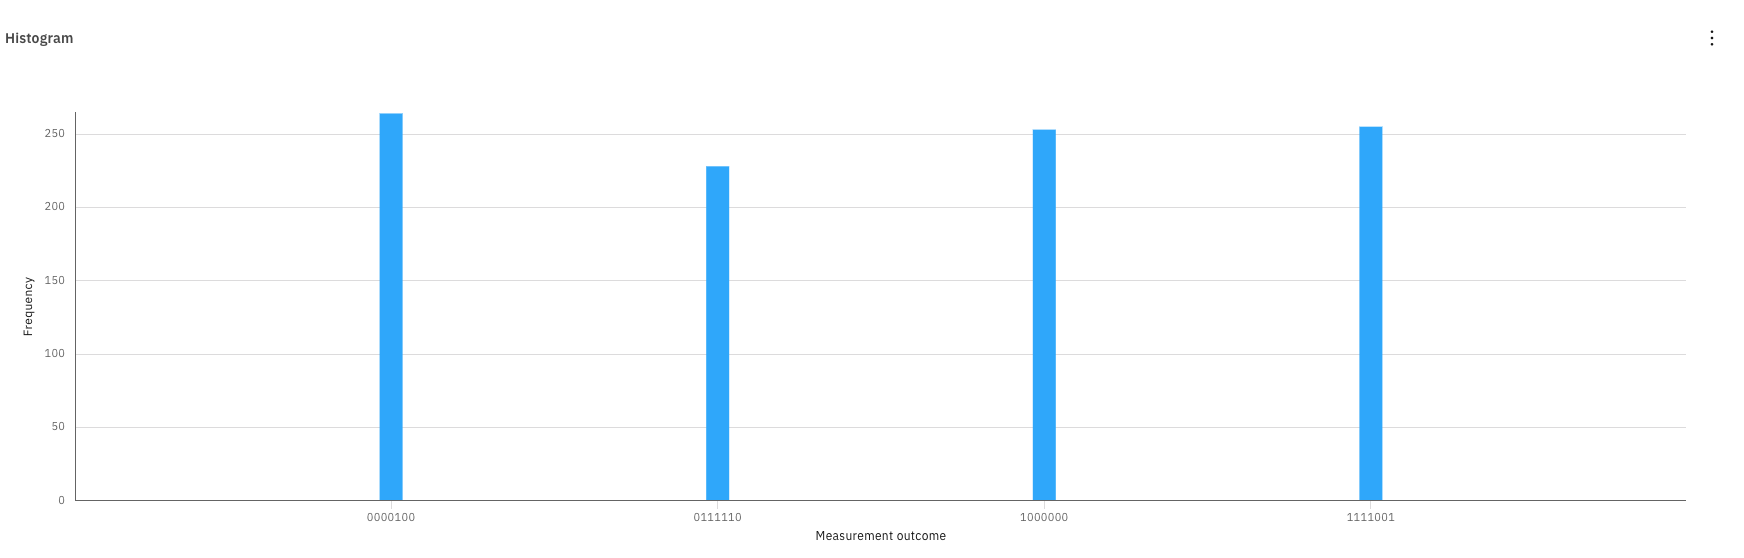
" />


</details>

# User defined functions

#### define multiple implementations for a given function

In the following example we define qiskit adders as custom function for the platform.

See the `ZeroQReg` and `AuxReg`, which informs the synthesis engine about the special purpose of these qubits

In [ ]:
from typing import Tuple

from qiskit.circuit.library import (
    CDKMRippleCarryAdder,
    DraperQFTAdder,
    VBERippleCarryAdder,
)

from classiq import (
    QASM_INTRO,
    AuxQReg,
    FunctionLibrary,
    QuantumFunction,
    QuantumFunctionFactory,
    ZeroQReg,
    qfunc,
)


class MyAdder(QuantumFunctionFactory):
    def __init__(self, reg_size: int, *args, **kwargs) -> None:
        self.reg_size = reg_size
        super().__init__(*args, **kwargs)

    @property
    def definition(self) -> QuantumFunction:
        @qfunc
        def cdkm_adder(
            left_arg: QReg[self.reg_size],
            right_arg: QReg[self.reg_size],
            carry: ZeroQReg[1],
            aux: AuxQReg[1],
        ) -> Tuple[QReg[self.reg_size], QReg[self.reg_size], QReg[1], AuxQReg[1]]:
            return CDKMRippleCarryAdder(self.reg_size, "half").qasm()

        @cdkm_adder.add_implementation
        def qft_adder(
            left_arg: QReg[self.reg_size],
            right_arg: QReg[self.reg_size],
            carry: ZeroQReg[1],
        ) -> Tuple[QReg[self.reg_size], QReg[self.reg_size], QReg[1]]:
            return DraperQFTAdder(self.reg_size, "half").decompose(reps=2).qasm()

        @cdkm_adder.add_implementation
        def vbe_adder(
            left_arg: QReg[self.reg_size],
            right_arg: QReg[self.reg_size],
            carry: ZeroQReg[1],
            aux: AuxQReg[self.reg_size - 1],
        ) -> Tuple[
            QReg[self.reg_size],
            QReg[self.reg_size],
            QReg[1],
            AuxQReg[self.reg_size - 1],
        ]:
            return VBERippleCarryAdder(self.reg_size, "half").qasm()

        return cdkm_adder

We define a model of controlled adder that it's output is wired to a second adder

In [ ]:
from classiq import (
    Constraints,
    ControlState,
    Model,
    Preferences,
    QReg,
    RegisterUserInput,
)


def create_custum_controlled_adder(num_qubits, num_controls, qubits_limit):
    constraints = Constraints(optimization_parameter="depth", max_width=qubits_limit)

    model = Model(constraints=constraints)

    function_library = FunctionLibrary(MyAdder)
    model.include_library(library=function_library)

    control_state = ControlState(num_ctrl_qubits=num_controls)

    # Call controlled adder
    qreg_result = QReg(num_qubits)
    qreg_result_carry = QReg(1)
    adder_outputs = model.MyAdder(num_qubits)(
        control_states=control_state,
        out_wires={"right_arg": qreg_result, "carry": qreg_result_carry},
    )

    # Call 2n adder
    adder_result = QReg.concat(qreg_result, qreg_result_carry)
    model.MyAdder(num_qubits + 1)(in_wires={"right_arg": adder_result})

    return synthesize(model.get_model())

#### the engine will search for implementations based on the constraints and optimization

In [ ]:
qprog = create_custum_controlled_adder(num_qubits=2, num_controls=2, qubits_limit=13)
show(qprog)

Can you find parameters (num_qubits, num_controls, qubits_limit) such that different adder implementation is chosen? You can also change the HW it is synthesized to
